# Лабораторная работа 3

Выполнил студент группы М8О-401Б-20 Зайцев Кирилл

## Оценка удовлетворенности полётом пассажира
Представлен датасет, в котором хранится информация о полётах пассажиров авиакомпании, а также оценка обслуживания их полёта. Необходимо спрогнозировать, к какому классу относится удовлетворение полётом: положительному или отрицательному

Подключим все необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

Посмотрим на данные в датасете:

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df_test = pd.read_csv('../data/test.csv')
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
df_train = df_train.drop(df_train.iloc[:, [0, 1]], axis = 1)
df_test = df_test.drop(df_test.iloc[:, [0, 1]], axis = 1)

Выведем количество пропусков в данных

In [5]:
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

Посмотрим на типы признаков в датасете: 

In [7]:
df_train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

к категориальным относятся: Gender, Customer Type, Type of Travel, Class

к порядковым относятся: Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location,  Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room, Baggage handling, Checkin service, Inflight service, Cleanliness. Они представляют собой оценки пассажиров оказанной услуге во время полёта

к количественным относятся все остальные

In [8]:
categorical_columns = df_train.select_dtypes(object)
categorical_features = categorical_columns.columns
categorical_features

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [9]:
grades_idx = list(range(6, 20))
grades = df_train.iloc[:, grades_idx]
grades_features = grades.columns

df_train[grades_features] = df_train[grades_features].astype('category')

grades_features



Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [10]:
numeric_data = df_train.select_dtypes(np.number)
numeric_features = numeric_data.columns
numeric_features

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

Проведём разведочный анализ данных в датасете:

In [11]:
df_train.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [12]:
df_train.describe(include = ['object', 'category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,58879


<Axes: >

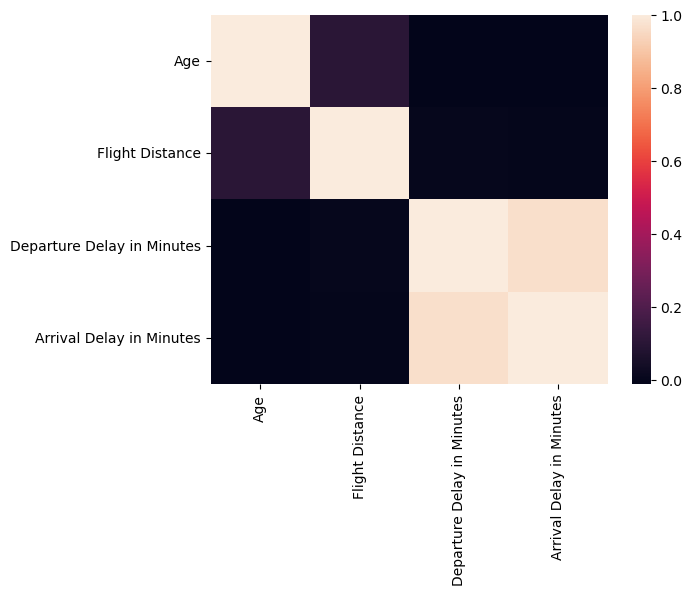

In [13]:
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr)

Заметна сильная корреляция между задержкой вылета и задержкой прибытия, что выглядит логично

([<matplotlib.patches.Wedge at 0x1356bc02990>,
 [Text(-0.22870506272227167, 1.0759618925804026, 'Neutral or dissatisfied'),
  Text(0.228705062722272, -1.0759618925804026, 'Satisfied')],
 [Text(-0.12474821603032998, 0.5868883050438559, '56.7%'),
  Text(0.12474821603033018, -0.5868883050438559, '43.3%')])

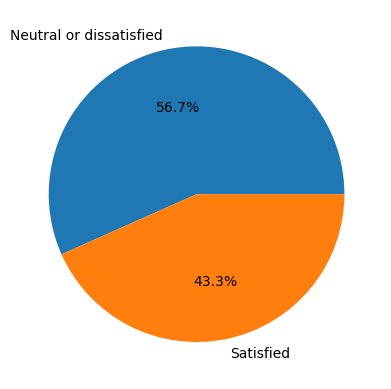

In [14]:
plt.pie(df_train.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], autopct = '%1.1f%%')

Как мы видим, нет сильного дисбаланса классов в выборке, что очень хорошо

Построим гистограммы зависимости вида полёта и дальности полёта для каждого из классов полёта

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


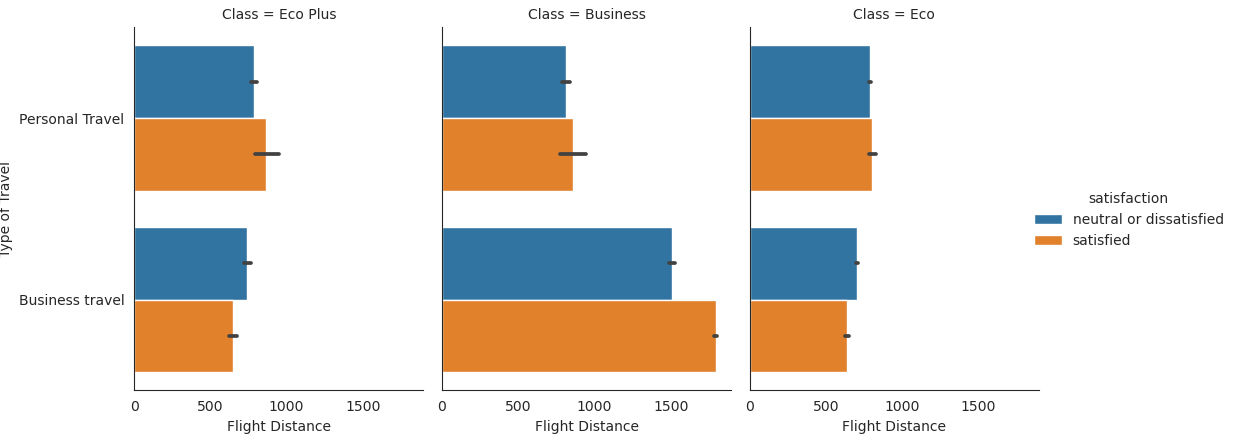

In [15]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=df_train, kind="bar", height=4.5, aspect=.8)

Теперь посмотрим, как оценки по каждому показателю влияют на удовлетворённость:

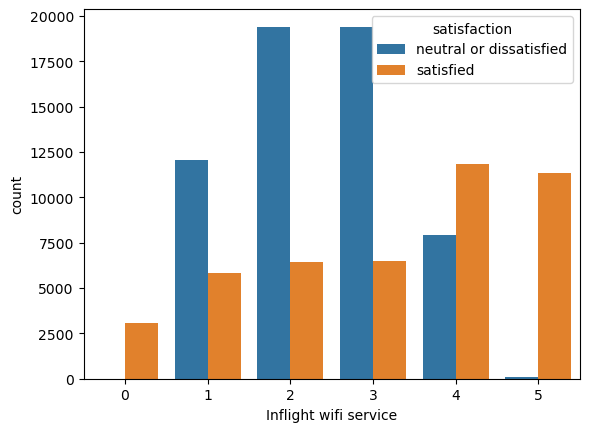

In [16]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', data = df_train)
plt.show()

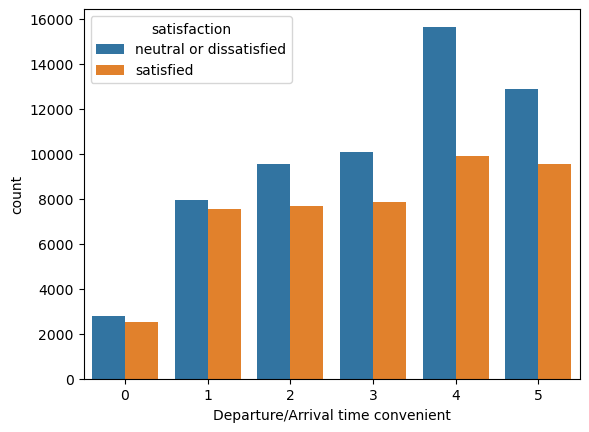

In [17]:
sns.countplot(x = 'Departure/Arrival time convenient', hue = 'satisfaction', data = df_train)
plt.show()

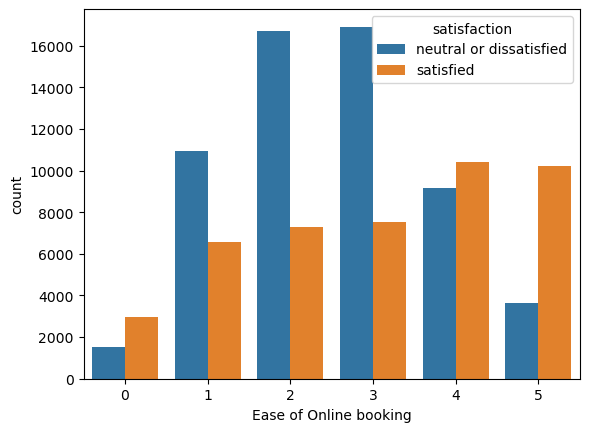

In [18]:
sns.countplot(x = 'Ease of Online booking', hue = 'satisfaction', data = df_train)
plt.show()

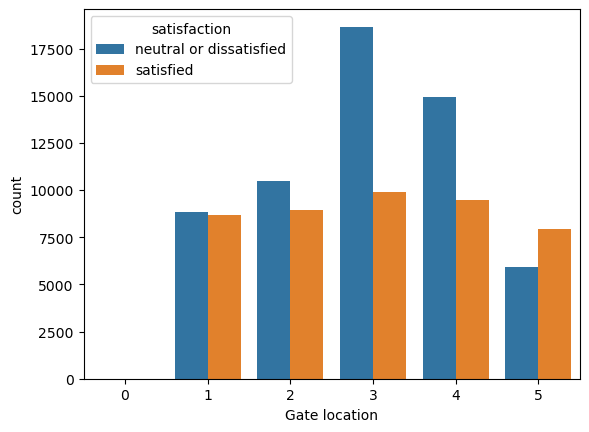

In [19]:
sns.countplot(x = 'Gate location', hue = 'satisfaction', data = df_train)
plt.show()

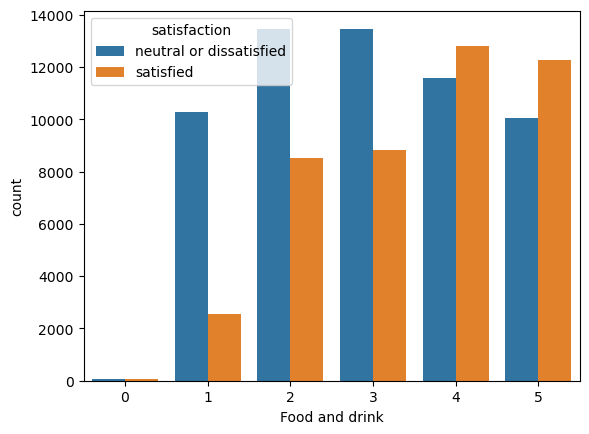

In [20]:
sns.countplot(x = 'Food and drink', hue = 'satisfaction', data = df_train)
plt.show()

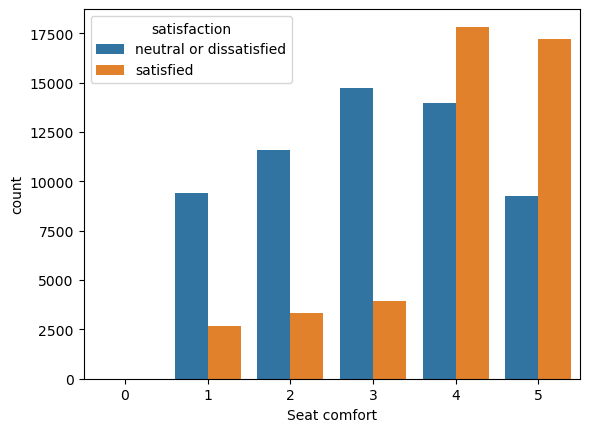

In [21]:
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', data = df_train)
plt.show()

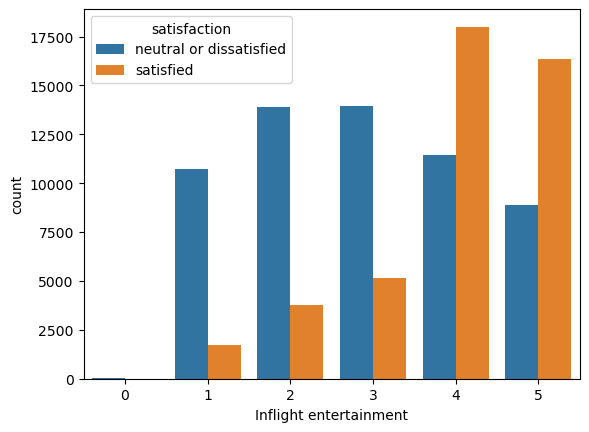

In [22]:
sns.countplot(x = 'Inflight entertainment', hue = 'satisfaction', data = df_train)
plt.show()

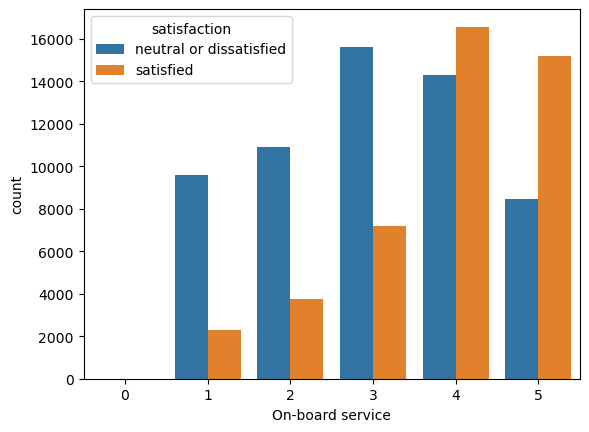

In [23]:
sns.countplot(x = 'On-board service', hue = 'satisfaction', data = df_train)
plt.show()

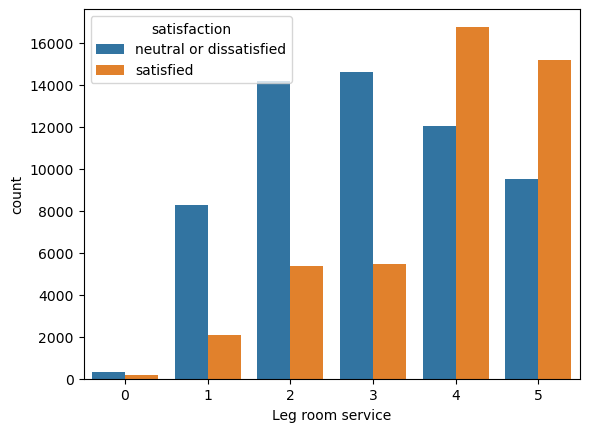

In [24]:
sns.countplot(x = 'Leg room service', hue = 'satisfaction', data = df_train)
plt.show()

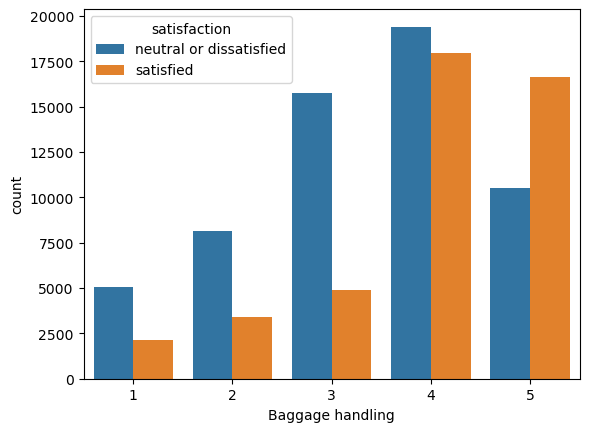

In [25]:
sns.countplot(x = 'Baggage handling', hue = 'satisfaction', data = df_train)
plt.show()

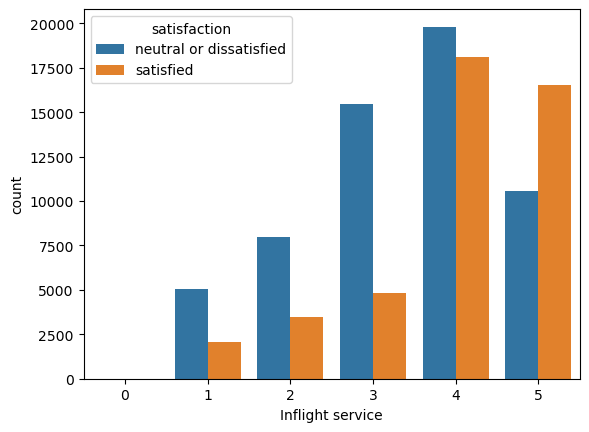

In [26]:
sns.countplot(x = 'Inflight service', hue = 'satisfaction', data = df_train)
plt.show()

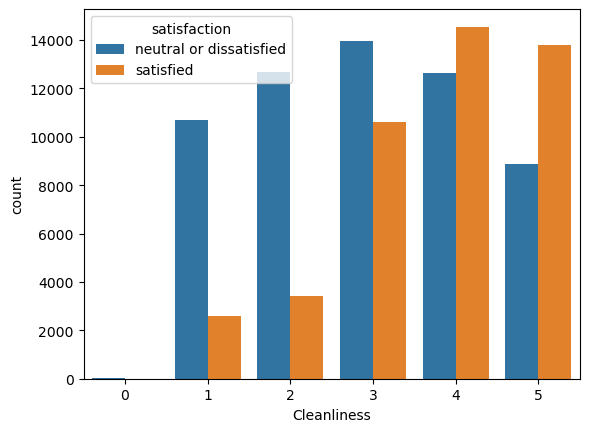

In [27]:
sns.countplot(x = 'Cleanliness', hue = 'satisfaction', data = df_train)
plt.show()

В столбце "Arrival Delay in Minutes" есть пропуски. Заполним их медианным значением задержки:

In [28]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mode()[0])
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mode()[0])

In [29]:
df_train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [30]:
df_test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Метрики качества. 
Для бинарной классификации классическими метриками качества являются: Precision(точность), Recall(полнота) и AUC-ROC.

Выделим таргет из нашего датасета:

In [31]:
X_train = df_train.drop(columns = ['satisfaction'])
y_train = df_train['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)
X_test = df_test.drop(columns = ['satisfaction'])
y_test = df_test['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)
categorical_features = categorical_features.drop('satisfaction')
categorical_features

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [32]:
X_train.shape

(103904, 22)

In [33]:
X_test.shape

(25976, 22)

In [34]:
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


## Оценка константным предиктором

Будем всегда считать, что пассажир остался удовлетворён своим полётом. Посмотрим на метрики качества и матрицу ошибки:

In [35]:
y_true = y_train.to_numpy()
y_pred = np.ones_like(y_train)

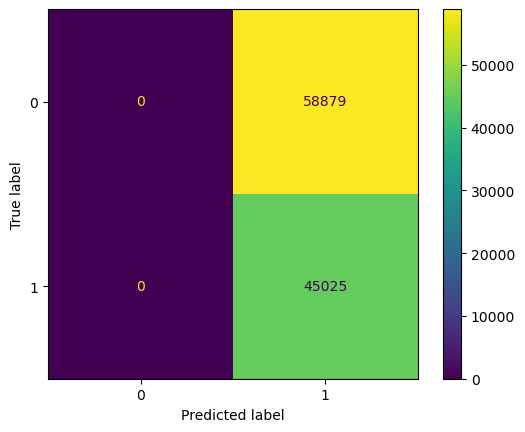

In [36]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

In [37]:
precision = precision_score(y_true, y_pred)
precision

0.43333269171542965

In [38]:
recall = recall_score(y_true, y_pred)
recall

1.0

In [39]:
TPR, FPR, threshold = roc_curve(y_true, y_pred)

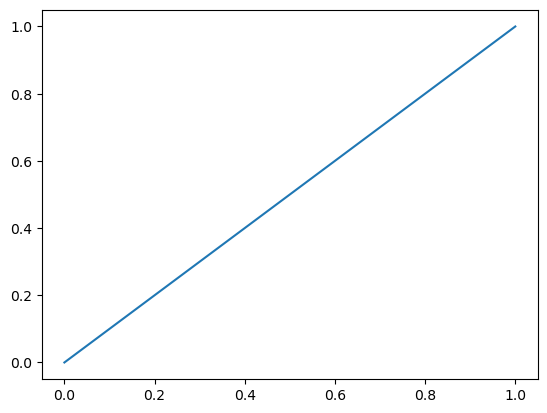

In [40]:
plt.plot(TPR, FPR)
plt.show()

In [41]:
roc_auc = roc_auc_score(y_true, y_pred)
roc_auc

0.5

Как мы видим Precision очень низкий, но Recall высокий, действительно, мы просто не могли упустить ни одной TP метки, потому что всегда предсказывали Positive. Этим и плохи данные метрики. AUC-ROC = 0.5. То есть наша модель случайна. Это тоже плохой результат

## Логистическая регрессия

Теперь обучим модель логистической регрессии и понаблюдаем за тем, как изменились наши метрики

In [42]:
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_features),
    ('ohe2', OneHotEncoder(), grades_features),
    ('scaler', StandardScaler(), numeric_features)
])

X_train_lin = ct.fit_transform(X_train)
X_test_lin = ct.transform(X_test)

In [43]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train_lin, y_train)
y_pred = model.predict(X_test_lin)

In [44]:
precision = precision_score(y_test, y_pred)
precision

0.9312751677852349

In [45]:
recall = recall_score(y_test, y_pred)
recall

0.9126545645882662

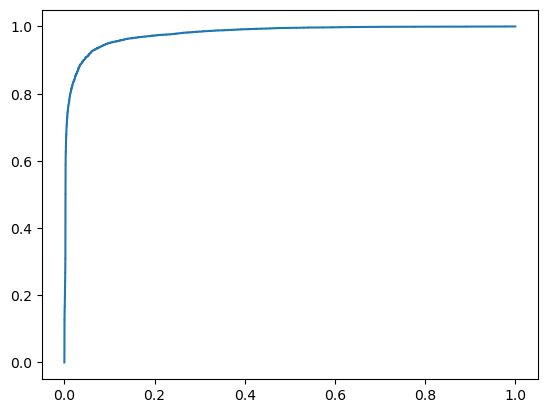

In [46]:
y_pred_proba = model.predict_proba(X_test_lin)[::,1]
TPR, FPR, threshold = roc_curve(y_test, y_pred_proba)
plt.plot(TPR, FPR)
plt.show()

In [47]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.979094684591454

Precision значительно увеличился, но уменьшился и Recall, что логично. ROC-AUC тоже возрос. Можно сделать вывод о том, что качество модели значительно улучшилось.

In [48]:
X_train_lin = X_train_lin.toarray()
X_test_lin = X_test_lin.toarray()

In [49]:
from math import exp

class Logreg:
    
    @staticmethod
    def log_loss(y_true, y_pred):
        loss = 0
        for i in range(len(y_true)):
            y = y_true[i]
            pred = y_pred[i]
            loss += -y*np.log(pred) - (1 - y)*np.log(1 - pred)
        loss /= len(y_true)
        return loss
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    def __init__(self, lr = 0.01, iters = 2000):
        self.lr = lr
        self.iters = iters
        self.w = None
        self.b = None
        
    def fit(self, X_train, y_train):
        samples, features = X_train.shape
        self.w = np.zeros(features)
        self.b = 0
        
        for _ in range(self.iters):
            logits = np.dot(X_train, self.w) + self.b
            preds = self.sigmoid(logits)
            
            dw = (1 / samples) * np.dot(X_train.T, (preds - y_train))
            db = (1 / samples) * np.sum(preds-y_train)
            
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
    
    def predict(self, X_test):
        logits = np.dot(X_test, self.w) + self.b
        preds = self.sigmoid(logits)
        classes = np.asarray([0 if y < 0.5 else 1 for y in preds])
        return classes
    
    def predict_proba(self, X_test):
        logits = np.dot(X_test, self.w) + self.b
        preds = self.sigmoid(logits)
        return preds

In [50]:
model_2 = Logreg()
model_2.fit(X_train_lin, y_train)
y_preds = model.predict(X_test_lin)

In [51]:
precision = precision_score(y_test, y_preds)
precision

0.9312751677852349

In [52]:
recall = recall_score(y_test, y_preds)
recall

0.9126545645882662

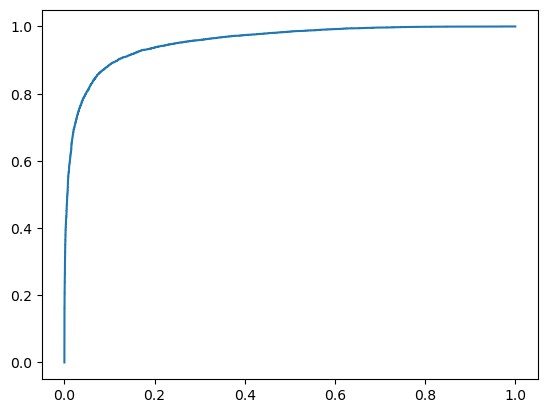

In [53]:
y_preds_proba = model_2.predict_proba(X_test_lin)
TPR, FPR, threshold = roc_curve(y_test, y_preds_proba)
plt.plot(TPR, FPR)
plt.show()

In [54]:
roc_auc = roc_auc_score(y_test, y_preds_proba)
roc_auc

0.9554635711086396

## Вывод

В ходе лабораторной я изучил модель логистической регрессии и применил её для взятого мною датасета. Сначала я использовал модель из библиотеки Sci-Kit Learn, затем сам реализовал модель логистической регрессии. Результаты двух моделей оказались практически идентичными, а метрики качества показывают, что данная модель отлично решает поставленную задачу.

# Лабораторная 4

## Деревья решений и ансамбли

Теперь для решения задачи классификации попробуем применить методы, основанные на деревьях решений. Сперва попробуем составить дерево решения, затем используем ансамбли: случайный лес и градиентный бустинг на деревьях.

Ниже приведена реализация решающего дерева. На нашей задаче, т.к. данных слишком много, а признаковое пространство имеет большую размерность, то обучение дерева будет очень долгим. Поэтому продемонстрируем, как работает решающее дерево на игрушечном примере

In [55]:
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [56]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import sys


X_mini, y_mini = make_classification(n_samples = 500, 
                           n_features = 2,
                           n_informative = 2, 
                           n_redundant = 0, 
                           n_clusters_per_class = 2, 
                           random_state = 43)
X_mini_train, X_mini_test, y_mini_train, y_mini_test = train_test_split(X_mini, y_mini, train_size = 0.8)

model_3 = DecisionTree()
model_3.fit(X_mini_train, y_mini_train)
y_pred = model_3.predict(X_mini_test)

In [57]:
precision = precision_score(y_mini_test, y_pred)
precision

0.9215686274509803

In [58]:
recall = recall_score(y_mini_test, y_pred)
recall

0.9591836734693877

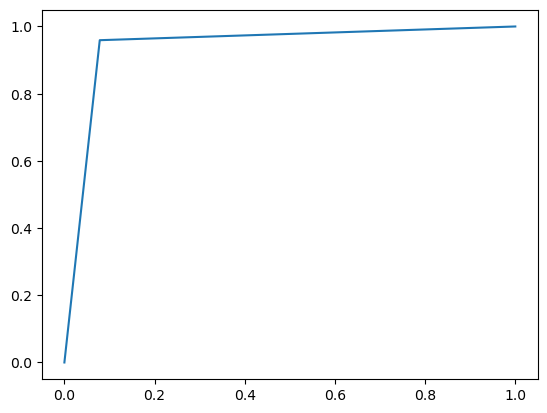

In [59]:
TPR, FPR, threshold = roc_curve(y_mini_test, y_pred)
plt.plot(TPR, FPR)
plt.show()

In [60]:
roc_auc = roc_auc_score(y_mini_test, y_pred)
roc_auc

0.9403761504601841

Дальше будем использовать класс DecisionTreeClassifier из sci-kit learn, потому что он более оптимизрован. Сложность алгоритма, предложенного мною O(n^2), а в этой библиотеке использована оптимизация, дающая сложность O(n*log(m)). Также там используется prunning

In [61]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train_lin, y_train)
y_preds = DTC.predict(X_test_lin)

In [62]:
precision = precision_score(y_test, y_preds)
precision

0.9402397410097121

In [63]:
recall = recall_score(y_test, y_preds)
recall

0.9423835832675612

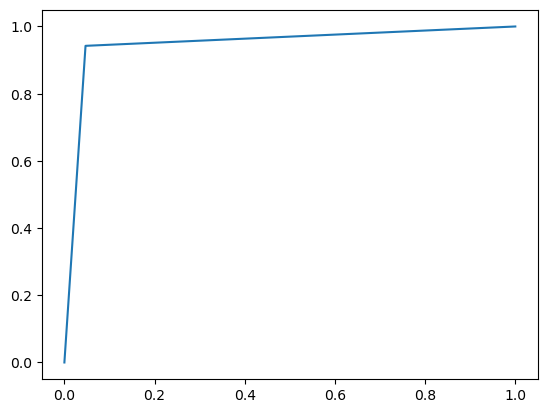

In [64]:
y_preds_proba = DTC.predict_proba(X_test_lin)[::,1]
TPR, FPR, threshold = roc_curve(y_test, y_preds_proba)
plt.plot(TPR, FPR)
plt.show()

In [65]:
roc_auc = roc_auc_score(y_test, y_preds)
roc_auc

0.9477580442928076

Решающее дерево дало неплохие результаты, все метрики улучшились

Теперь имплементируем случайный лес:

In [66]:
class RandomForest:
    def __init__(self, n_estimators = 20, max_depth = 20, min_samples_split = 2, n_features = None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []
        
    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_depth = self.max_depth, 
                                          min_samples_split = self.min_samples_split,
                                          splitter = 'random')
            X_sample, y_sample = self._bootstraping(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    @staticmethod
    def _bootstraping(X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]
    
    @staticmethod
    def _most_popular_label(y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_popular_label(pred) for pred in tree_preds])
        return predictions
    

In [67]:
RF = RandomForest()
RF.fit(X_train_lin, y_train)
y_preds = RF.predict(X_test_lin)

In [68]:
precision = precision_score(y_test, y_preds)
precision

0.9703033046627433

In [69]:
recall = recall_score(y_test, y_preds)
recall

0.939840392879067

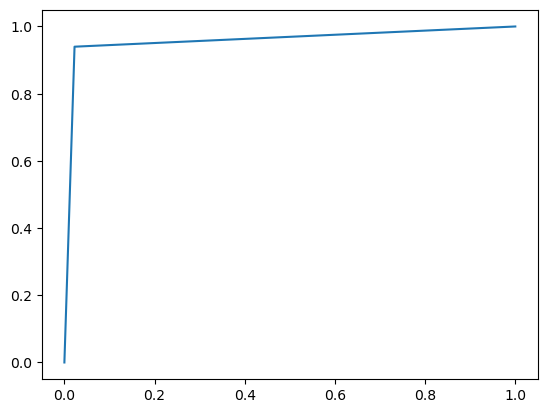

In [70]:
TPR, FPR, threshold = roc_curve(y_test, y_preds)
plt.plot(TPR, FPR)
plt.show()

In [71]:
roc_auc = roc_auc_score(y_test, y_preds)
roc_auc

0.958666508111804

Ансамблирование улучшило все метрики качества. Теперь попробуем использовать RandomForestClassifier из sci-kit learn

In [72]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train_lin, y_train)
y_preds = RFC.predict(X_test_lin)

In [73]:
precision = precision_score(y_test, y_preds)
precision

0.9704553668232743

In [74]:
recall = recall_score(y_test, y_preds)
recall

0.9419451021660966

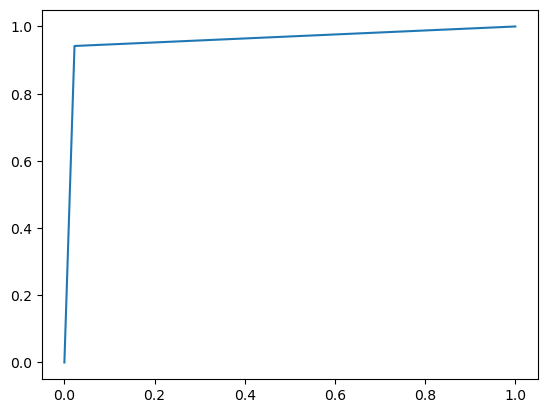

In [75]:
TPR, FPR, threshold = roc_curve(y_test, y_preds)
plt.plot(TPR, FPR)
plt.show()

In [76]:
roc_auc = roc_auc_score(y_test, y_preds)
roc_auc

0.9597531727807083

Метрики показали качество лучше. В дефолтных параметрах sklearn больше деревьев, которые глубже, но при этом из-за того, что всё распараллелено, то скорость обучения леса выше

Теперь попробуем градиентный бустинг

In [77]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from scipy.optimize import minimize

class GradientBoostingMachine():
    def __init__(self, n_trees, learning_rate=0.1, max_depth=1):
        self.n_trees=n_trees; 
        self.learning_rate=learning_rate
        self.max_depth=max_depth;
    
    def fit(self, X, y, objective):
        self.trees = []
        self.base_prediction = self._get_optimal_base_value(y, objective.loss)
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        for _ in range(self.n_trees):
            pseudo_residuals = objective.negative_gradient(y, current_predictions)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, pseudo_residuals)
            self._update_terminal_nodes(tree, X, y, current_predictions, objective.loss)
            current_predictions += self.learning_rate * tree.predict(X)
            self.trees.append(tree)
     
    def _get_optimal_base_value(self, y, loss):
        fun = lambda c: loss(y, c)
        c0 = y.mean()
        return minimize(fun=fun, x0=c0).x[0]
        
    def _update_terminal_nodes(self, tree, X, y, current_predictions, loss):
        leaf_nodes = np.nonzero(tree.tree_.children_left == -1)[0]
        leaf_node_for_each_sample = tree.apply(X)
        for leaf in leaf_nodes:
            samples_in_this_leaf = np.where(leaf_node_for_each_sample == leaf)[0]
            y_in_leaf = y.take(samples_in_this_leaf, axis=0)
            preds_in_leaf = current_predictions.take(samples_in_this_leaf, axis=0)
            val = self._get_optimal_leaf_value(y_in_leaf, 
                                               preds_in_leaf,
                                               loss)
            tree.tree_.value[leaf, 0, 0] = val
            
    def _get_optimal_leaf_value(self, y, current_predictions, loss):
        fun = lambda c: loss(y, current_predictions + c)
        c0 = y.mean()
        return minimize(fun=fun, x0=c0).x[0]
          
    def predict(self, X):
        return (self.base_prediction 
                + self.learning_rate 
                * np.sum([tree.predict(X) for tree in self.trees], axis=0))

In [78]:
def expit(t):
    return np.exp(t) / (1 + np.exp(t))

class BinaryCrossEntropyLoss():
    
    def __init__(self):
        self.expit = lambda t: np.exp(t) / (1 + np.exp(t))
    
    def loss(self, y, preds):
        p = self.expit(preds)
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    
    def negative_gradient(self, y, preds):
        p = self.expit(preds)
        return y / p - (1 - y) / (1 - p)

In [79]:
gbm = GradientBoostingMachine(n_trees=500,
                              learning_rate=0.5,
                              max_depth=1)
gbm.fit(X_train_lin, y_train, BinaryCrossEntropyLoss())
pred = expit(gbm.predict(X_test_lin))

In [80]:
pred = np.round(pred)
pred

array([1., 1., 0., ..., 0., 1., 0.])

In [81]:
precision = precision_score(y_test, pred)
precision

0.8805943902224567

In [82]:
recall = recall_score(y_test, pred)
recall

0.8782776462334473

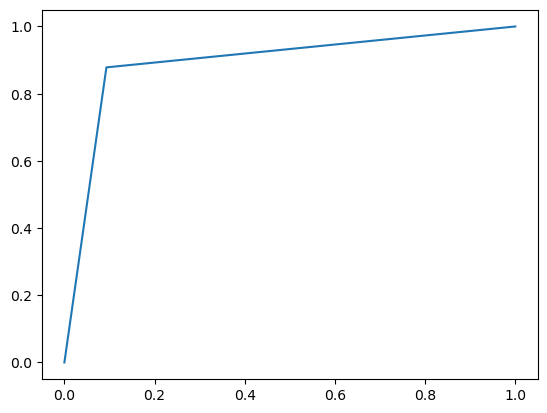

In [83]:
TPR, FPR, threshold = roc_curve(y_test, pred)
plt.plot(TPR, FPR)
plt.show()

In [84]:
roc_auc = roc_auc_score(y_test, pred)
roc_auc

0.892545808637893

Точность хорошая, но стала хуже по сравнению со случайным лесом. Возможно, это связано с тем, что случайный лес лучше подходит для нашей задачи

Теперь попробуем XGBoost:

In [85]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [86]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 1000)
xgb.fit(X_train_lin, y_train)
preds = xgb.predict(X_test_lin)

In [87]:
precision = precision_score(y_test, preds)
precision

0.9673366834170855

In [88]:
recall = recall_score(y_test, preds)
recall

0.94536525475752

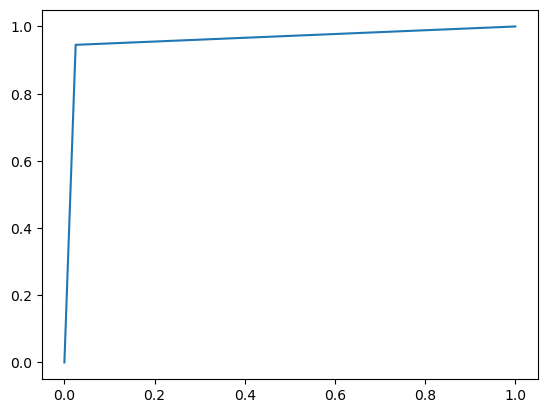

In [89]:
TPR, FPR, threshold = roc_curve(y_test, preds)
plt.plot(TPR, FPR)
plt.show()

In [90]:
roc_auc = roc_auc_score(y_test, preds)
roc_auc

0.9601937781370116

XGBoost показал отличный результат. Также время работы существенно меньше, чем у моей реализации

## Вывод

В ходе работы я изучил различные методы решения задач классификации: логистическая регрессия, деревья решений, Random forest и градиентный бустинг. Лучший результат показал градиентный бустинг.